<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


### Let's try to create some synthetic data here


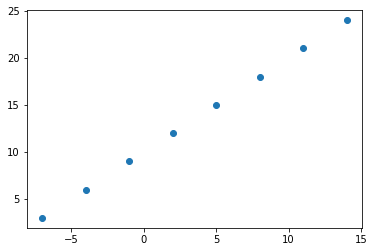

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# creating features
x = np.array([-7.0,-4.0,-1.0,2,5,8,11,14])

# creating labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(x,y)

In [4]:
## converting the arrays into tensors
x_tensor = tf.constant(x)
y_tensor = tf.constant(y)
x_tensor,y_tensor

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Steps in modeling with tensorflow
1. Creating a model- define the input, output and hidden layers.
2. Compiling a model- Define the loss function which tells our model how wrong it is. Optimizer tells your model how to improve the pattern it is leaning and evaluation metrics.
3. Fitting a model: training the model. 

In [24]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)   ## as we will only pass 1
])

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 0s 234ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


## Above we used loss and metrics to be same and that's why we can see loss: and mae: values to be same for every epoch. Let's try to predict and check .

In [21]:
tf.expand_dims(x,axis=1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [25]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Another way of creating models


In [26]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 0s 201ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


## As we observed up that prediction is not that good, Let's see now how can we increase the prediction accuracy

### Steps we can do to improve our model
1. **while creating a model** - We may add more layers, increase the neurons in hidden layers, change the activation function
2. **Compiling the model** - Here we can change the optimization function or the **learning rate** of it.
3. **Fitting a model** - Here we can fit a model for more epochs, or more data examples to learn

In [31]:
## creating another version of the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## fitting the model on 100 epochs

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 7ms

In [32]:
model.predict([17.0]) ## we can see that the output is somewhat closer than what we expect

array([[29.901575]], dtype=float32)

In [34]:
## Let's create another set of model with different configurations
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 345ms/step - loss: 13.7714 - mae: 13.7714
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4899 - mae: 13.4899
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2094 - mae: 13.2094
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9254 - mae: 12.9254
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6335 - mae: 12.6335
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3289 - mae: 12.3289
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0067 - mae: 12.0067
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6613 - mae: 11.6613
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2863 - mae: 11.2863
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8743 - mae: 10.8743
Epoch 11/100
1/1 [==============================] - 0s 

In [35]:
model.predict([17.0])

array([[33.222195]], dtype=float32)

In [37]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 271ms/step - loss: 15.4890 - mae: 15.4890
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 15.4828 - mae: 15.4828
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 15.4766 - mae: 15.4766
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 15.4704 - mae: 15.4704
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 15.4642 - mae: 15.4642
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 15.4580 - mae: 15.4580
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 15.4517 - mae: 15.4517
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 15.4455 - mae: 15.4455
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 15.4393 - mae: 15.4393
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 15.4331 - mae: 15.4331
Epoch 11/100
1/1 [==============================] - 0s 4m

In [39]:
model.predict([17.0])

array([[-6.9566054]], dtype=float32)

## Looks like ADAM optimizer is not working for us but let's try with other learning rate

In [40]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 344ms/step - loss: 13.3176 - mae: 13.3176
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0788 - mae: 13.0788
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8343 - mae: 12.8343
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5838 - mae: 12.5838
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3271 - mae: 12.3271
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0639 - mae: 12.0639
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7939 - mae: 11.7939
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5166 - mae: 11.5166
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2316 - mae: 11.2316
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9381 - mae: 10.9381
Epoch 11/100
1/1 [==============================] - 0s 7

In [41]:
model.predict([17.0])

array([[26.469387]], dtype=float32)